In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [6]:
from flask import Flask, render_template, request
import mysql.connector

In [12]:
def fetch_crime_data():
    connector = mysql.connector.connect(
        host = '127.0.0.1',
        user = 'root',
        password='navya',
        database='crime',
        port = 3306,
    )

    query = """ Select case_id, crime_year,crime_month,crime_day,crime_time_slot,zone,police_station,area_type,
    population_density,festival_season,prior_criminal_record,victim_age,victim_gender,crime_type from crimedetail """

    df = pd.read_sql(query,connector)

    connector.close()
    return df

In [14]:
df = fetch_crime_data()

C:\Users\rishi\AppData\Local\Temp\ipykernel_39548\816347599.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connector)


In [15]:
df.head()

,case_id,crime_year,crime_month,crime_day,crime_time_slot,zone,police_station,area_type,population_density,festival_season,prior_criminal_record,victim_age,victim_gender,crime_type
0,JPR-2026-0001,2023,7,15,Night,North,civil lines,Urban,32000,0,1,28,Female,Theft
1,JPR-2026-0002,2022,10,5,Evening,Central,manak chowk,Commercial,45000,1,0,41,Male,Theft
2,JPR-2026-0103,2024,3,9,Morning,South,Mansarovar,Residential,30000,0,0,34,Male,Burglary
3,JPR-2026-0104,2023,12,31,Night,West,Vaishali Nagar,Residential,26000,1,1,22,Female,Cyber Crime
4,JPR-2026-0105,2021,6,18,Afternoon,North,Jhotwara,Urban,34000,0,0,41,Male,Assault


In [18]:
df.dtypes

case_id                  object
crime_year                int64
crime_month               int64
crime_day                 int64
crime_time_slot          object
zone                     object
police_station           object
area_type                object
population_density        int64
festival_season           int64
prior_criminal_record     int64
victim_age                int64
victim_gender            object
crime_type               object
dtype: object

In [17]:
df.isnull().sum()

case_id                  0
crime_year               0
crime_month              0
crime_day                0
crime_time_slot          0
zone                     0
police_station           0
area_type                0
population_density       0
festival_season          0
prior_criminal_record    0
victim_age               0
victim_gender            0
crime_type               0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   case_id                38 non-null     object
 1   crime_year             38 non-null     int64 
 2   crime_month            38 non-null     int64 
 3   crime_day              38 non-null     int64 
 4   crime_time_slot        38 non-null     object
 5   zone                   38 non-null     object
 6   police_station         38 non-null     object
 7   area_type              38 non-null     object
 8   population_density     38 non-null     int64 
 9   festival_season        38 non-null     int64 
 10  prior_criminal_record  38 non-null     int64 
 11  victim_age             38 non-null     int64 
 12  victim_gender          38 non-null     object
 13  crime_type             38 non-null     object
dtypes: int64(7), object(7)
memory usage: 4.3+ KB


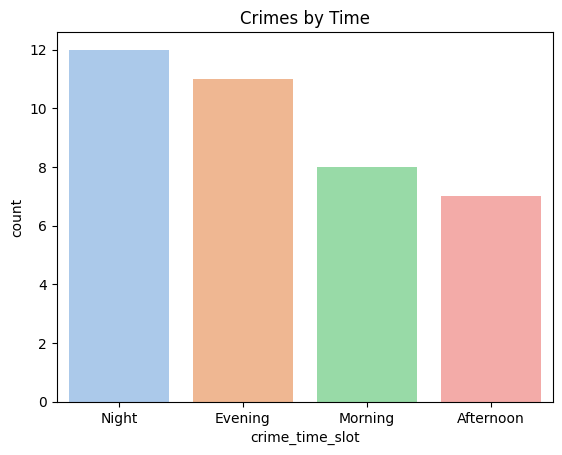

In [34]:
sns.countplot(data=df, x='crime_time_slot',hue='crime_time_slot', palette='pastel')
plt.title("Crimes by Time")
plt.show()

- Most crime occurs during night and evening time

- Least crime occurs during afternoon

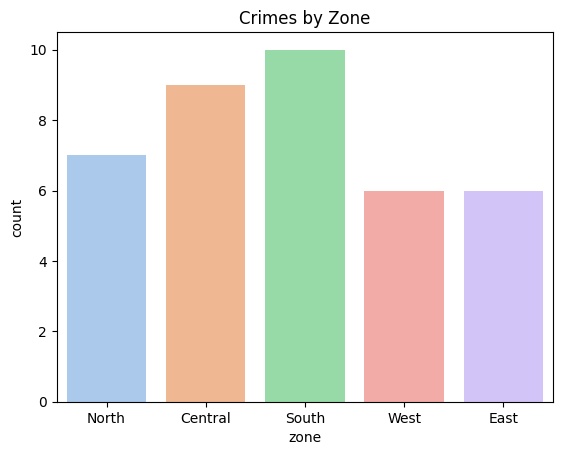

In [31]:
sns.countplot(data=df, x='zone',hue='zone', palette='pastel')
plt.title("Crimes by Zone")
plt.show()

- South zone followed by central zone of jaipur has the highest number of crimes

- West and East has the least number of crimes

- Law enforcemnet should focus on South and Central zone

<Axes: xlabel='area_type', ylabel='count'>

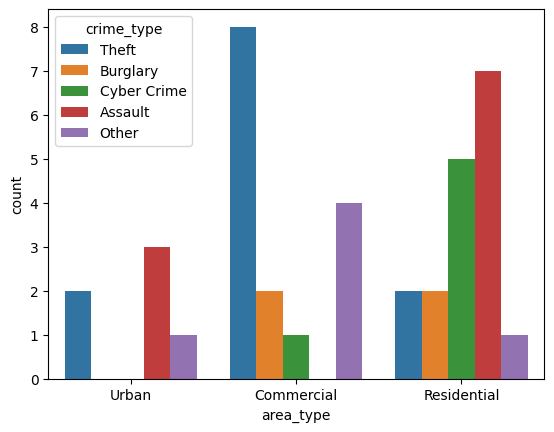

In [36]:
sns.countplot(data=df, x='area_type', hue='crime_type')

- Most crimes occur in residential and commercial areas.

- Certain crime types like theft, assualt, cyber crime are more frequent in residential area.



<Axes: xlabel='victim_gender', ylabel='count'>

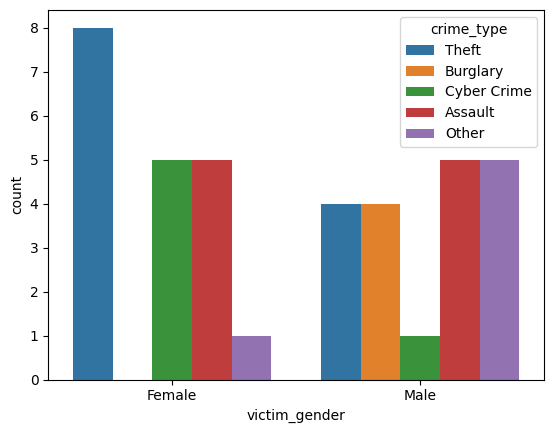

In [37]:
sns.countplot(data=df, x='victim_gender', hue='crime_type')

- Majority of victims are Female.

- Some crimes like theft,cyber crime, assualt target female more, On the other hand Male are also the victim of assualt and other crimes. 



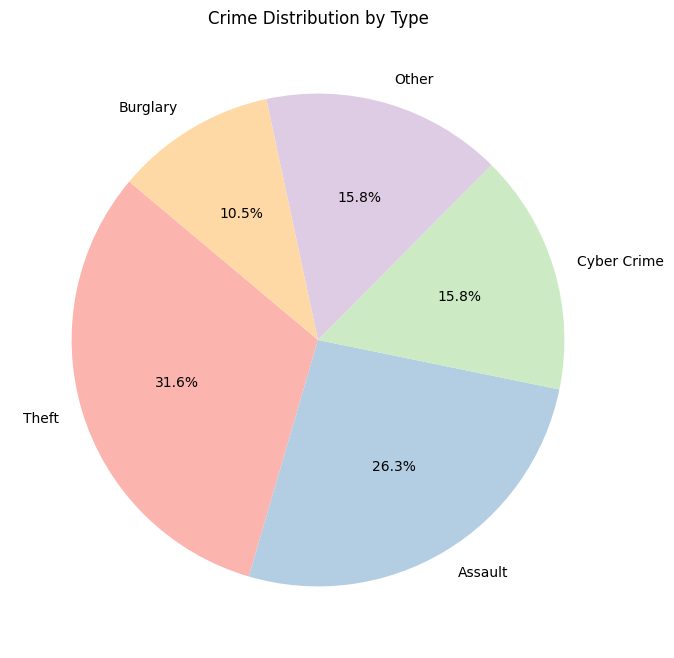

In [48]:
crime_counts = df['crime_type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(crime_counts, labels=crime_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Crime Distribution by Type")
plt.show()

- Theft is the most frequent crime followed by assualt.

- Crimes like burglary is least frequent.

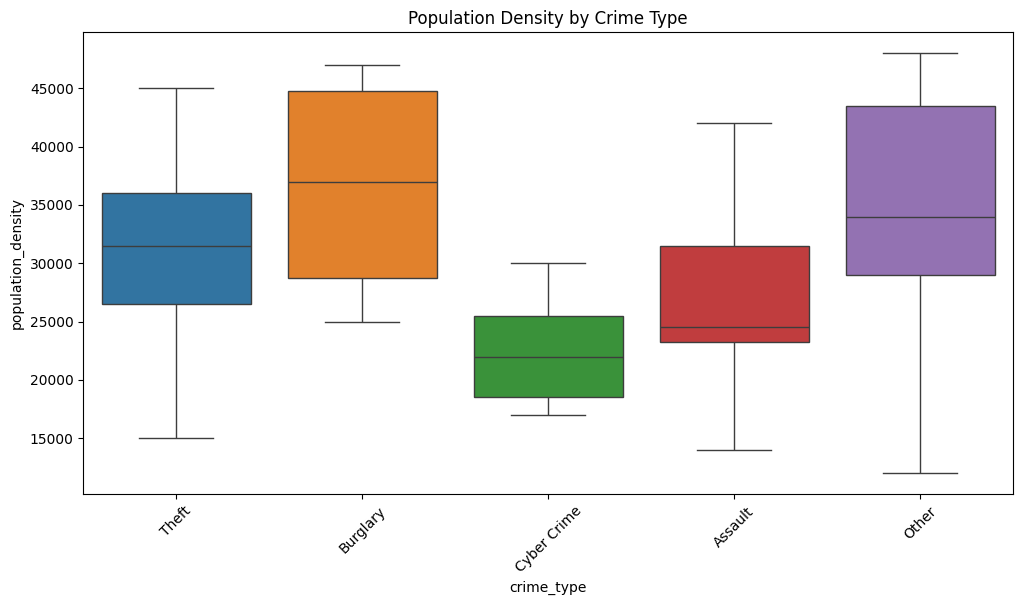

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='crime_type', y='population_density',hue='crime_type')
plt.title("Population Density by Crime Type")
plt.xticks(rotation=45)
plt.show()

- This shows which crime types happen in high or low population density areas.

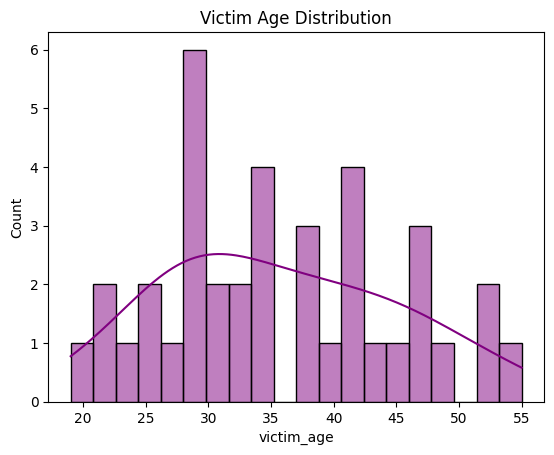

In [43]:
sns.histplot(df['victim_age'], bins=20, kde=True, color='purple')
plt.title("Victim Age Distribution")
plt.show()

- Most crimes are happeing with the victim of age around 30 - 45

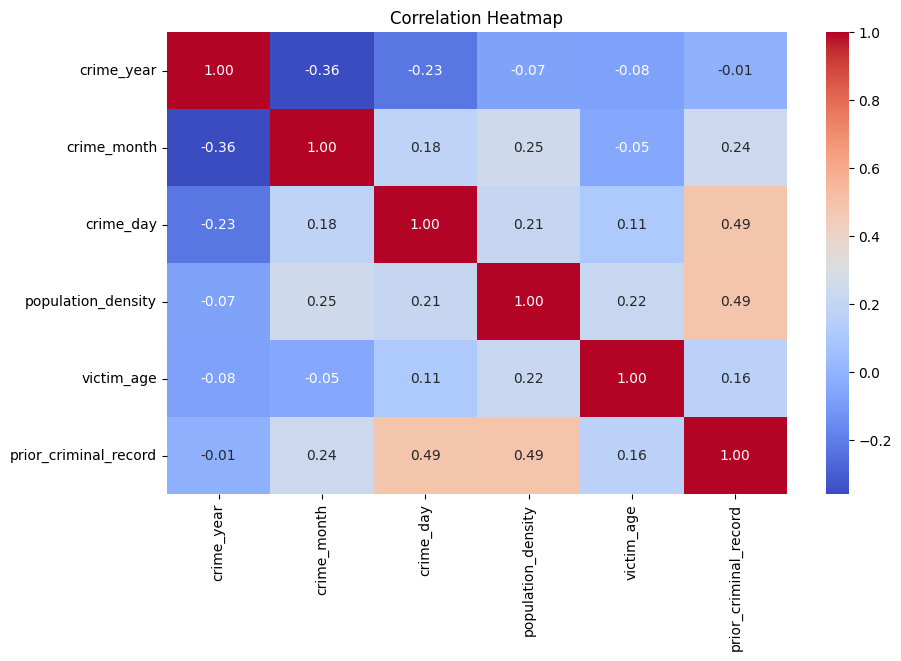

In [46]:
numeric_cols = ['crime_year', 'crime_month', 'crime_day', 'population_density', 'victim_age', 'prior_criminal_record']

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [49]:
df.head()

,case_id,crime_year,crime_month,crime_day,crime_time_slot,zone,police_station,area_type,population_density,festival_season,prior_criminal_record,victim_age,victim_gender,crime_type
0,JPR-2026-0001,2023,7,15,Night,North,civil lines,Urban,32000,0,1,28,Female,Theft
1,JPR-2026-0002,2022,10,5,Evening,Central,manak chowk,Commercial,45000,1,0,41,Male,Theft
2,JPR-2026-0103,2024,3,9,Morning,South,Mansarovar,Residential,30000,0,0,34,Male,Burglary
3,JPR-2026-0104,2023,12,31,Night,West,Vaishali Nagar,Residential,26000,1,1,22,Female,Cyber Crime
4,JPR-2026-0105,2021,6,18,Afternoon,North,Jhotwara,Urban,34000,0,0,41,Male,Assault


In [50]:
df = df.drop(columns=['case_id'])

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lb = LabelEncoder()

In [53]:
df['crime_time_slot'] = lb.fit_transform(df['crime_time_slot'])
df['crime_type'] = lb.fit_transform(df['crime_type'])
df['police_station'] = lb.fit_transform(df['police_station'])
df['zone'] = lb.fit_transform(df['zone'])
df['area_type'] = lb.fit_transform(df['area_type'])
df['victim_gender'] = lb.fit_transform(df['victim_gender'])

In [55]:
x = df.drop(columns=['crime_type'])
y = df['crime_type']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [71]:
y_pred = rf.predict(x_test)

In [72]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy = accuracy_score(y_test, y_pred)
accuracy*100

50.0